In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

bonthe sl
sangar ru
comodoro rivadavia ar
coromandel br
mukhen ru
yellowknife ca
saskylakh ru
rikitea pf
midleton ie
saint-philippe re
papasquiaro mx
barrow us
dondo mz
yoichi jp
grand river south east mu
vaini to
mataura pf
arya ru
pangnirtung ca
hermanus za
lebu cl
portland au
tiksi ru
bolungarvik is
warqla dz
rikitea pf
thompson ca
punta arenas cl
provideniya ru
khovu-aksy ru
bredasdorp za
rikitea pf
cape town za
ushuaia ar
saldanha za
bredasdorp za
nuevitas cu
vestmannaeyjar is
hilo us
arraial do cabo br
saldanha za
mataura pf
kodiak us
barrow us
hobart au
cape town za
georgetown sh
naze jp
saskylakh ru
salalah om
upata ve
tuktoyaktuk ca
saint anthony ca
avarua ck
nunoa pe
comodoro rivadavia ar
itarema br
punta arenas cl
nikolskoye ru
taolanaro mg
cape town za
challapata bo
puerto ayora ec
kruisfontein za
port elizabeth za
puerto ayora ec
port alfred za
punta arenas cl
butaritari ki
mount gambier au
taldan ru
punta arenas cl
kalispell us
saint george bm
lolua tv
los llanos de arida

tumannyy ru
sivaki ru
grand river south east mu
kadykchan ru
punta arenas cl
ushuaia ar
new norfolk au
kiruna se
esperance au
armacao dos buzios br
ushuaia ar
kargasok ru
saleaula ws
cape town za
tura ru
port elizabeth za
nara ml
yavaros mx
albany au
punta arenas cl
saint-philippe re
vila vu
sinkat sd
mataura pf
yellowknife ca
mataura pf
hobart au
mildura au
nikolskoye ru
shitanjing cn
puerto ayora ec
yanan cn
ponta do sol cv
mataura pf
atuona pf
makakilo city us
rikitea pf
salta ar
tual id
vaini to
rikitea pf
banepa np
tuatapere nz
dzhebariki-khaya ru
aklavik ca
karratha au
iqaluit ca
taolanaro mg
castro cl
barrow us
rawson ar
cape town za
avera pf
carnarvon au
ushuaia ar
puerto ayora ec
rikitea pf
tazovskiy ru
mataura pf
gat ly
izhma ru
saint-philippe re
namibe ao
kapaa us
barrow us
rassvet ru
hermanus za
ushuaia ar
butaritari ki
illoqqortoormiut gl
east london za
bandarbeyla so
phonhong la
katobu id
thompson ca
cape town za
upernavik gl
olinda br
port alfred za
port-gentil ga
chute-

hithadhoo mv
port alfred za
longyearbyen sj
rikitea pf
sambava mg
rikitea pf
busselton au
east london za
broken hill au
saint george bm
busselton au
castro cl
mount gambier au
isangel vu
nakamura jp
shyroke ua
te anau nz
wahiawa us
punta arenas cl
leningradskiy ru
nikolskoye ru
atuona pf
chagda ru
qaqortoq gl
siniscola it
port elizabeth za
tasiilaq gl
goundam ml
bartica gy
cape town za
port hardy ca
illoqqortoormiut gl
saint-philippe re
punta arenas cl
busselton au
yellowknife ca
ancud cl
saldanha za
inhambane mz
mataura pf
la cruz mx
ustka pl
luderitz na
bayonet point us
cape town za
majene id


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05155aed291a96cdfdb6ea0e35541d7c


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bonthe
Processing Record 2 of Set 1 | sangar
Processing Record 3 of Set 1 | comodoro rivadavia
Processing Record 4 of Set 1 | coromandel
Processing Record 5 of Set 1 | mukhen
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | saskylakh
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | midleton
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | papasquiaro
City not found. Skipping...
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | dondo
Processing Record 14 of Set 1 | yoichi
Processing Record 15 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | arya
Processing Record 19 of Set 1 | pangnirtung
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | lebu
Processing Recor

Processing Record 35 of Set 4 | makakilo city
Processing Record 36 of Set 4 | grindavik
Processing Record 37 of Set 4 | mus
Processing Record 38 of Set 4 | kirakira
Processing Record 39 of Set 4 | formosa do rio preto
Processing Record 40 of Set 4 | novopetrovskoye
Processing Record 41 of Set 4 | mumford
Processing Record 42 of Set 4 | bengkulu
Processing Record 43 of Set 4 | srednekolymsk
Processing Record 44 of Set 4 | mehamn
Processing Record 45 of Set 4 | isparta
Processing Record 46 of Set 4 | saint marys
Processing Record 47 of Set 4 | sitka
Processing Record 48 of Set 4 | villa maria
Processing Record 49 of Set 4 | bayir
Processing Record 50 of Set 4 | yarmouth
Processing Record 1 of Set 5 | san-pedro
Processing Record 2 of Set 5 | vardo
Processing Record 3 of Set 5 | fairbanks
Processing Record 4 of Set 5 | along
Processing Record 5 of Set 5 | berlevag
Processing Record 6 of Set 5 | paamiut
Processing Record 7 of Set 5 | artyk
City not found. Skipping...
Processing Record 8 of 

Processing Record 26 of Set 8 | menongue
Processing Record 27 of Set 8 | bardiyah
Processing Record 28 of Set 8 | lanzhou
Processing Record 29 of Set 8 | kochi
Processing Record 30 of Set 8 | middleton
Processing Record 31 of Set 8 | dingle
Processing Record 32 of Set 8 | fevralsk
City not found. Skipping...
Processing Record 33 of Set 8 | nanortalik
Processing Record 34 of Set 8 | san ramon de la nueva oran
Processing Record 35 of Set 8 | mingaora
Processing Record 36 of Set 8 | galveston
Processing Record 37 of Set 8 | bonavista
Processing Record 38 of Set 8 | esna
Processing Record 39 of Set 8 | viseu
Processing Record 40 of Set 8 | semypolky
Processing Record 41 of Set 8 | el balyana
City not found. Skipping...
Processing Record 42 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 43 of Set 8 | sivaki
Processing Record 44 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 45 of Set 8 | kiruna
Processing Record 46 of Set 8 | kargasok
Processing Record

Processing Record 14 of Set 12 | labuhan
Processing Record 15 of Set 12 | ginir
Processing Record 16 of Set 12 | korem
Processing Record 17 of Set 12 | daru
Processing Record 18 of Set 12 | sao felix do xingu
Processing Record 19 of Set 12 | novikovo
Processing Record 20 of Set 12 | kralendijk
Processing Record 21 of Set 12 | buchanan
Processing Record 22 of Set 12 | emerald
Processing Record 23 of Set 12 | mirabad
Processing Record 24 of Set 12 | nuevo laredo
Processing Record 25 of Set 12 | athabasca
Processing Record 26 of Set 12 | hihifo
City not found. Skipping...
Processing Record 27 of Set 12 | allapalli
Processing Record 28 of Set 12 | dossor
Processing Record 29 of Set 12 | solana beach
Processing Record 30 of Set 12 | san cristobal
Processing Record 31 of Set 12 | malangali
Processing Record 32 of Set 12 | bowen
Processing Record 33 of Set 12 | chalmette
Processing Record 34 of Set 12 | ipeti
City not found. Skipping...
Processing Record 35 of Set 12 | samusu
City not found. 

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bonthe,7.5264,-12.5050,81.73,79,22,9.82,SL,2021-04-08 18:56:29
1,Sangar,63.9242,127.4739,16.59,91,100,20.54,RU,2021-04-08 18:56:29
2,Comodoro Rivadavia,-45.8667,-67.5000,64.40,48,0,3.44,AR,2021-04-08 18:56:30
3,Coromandel,-18.4733,-47.2003,74.28,57,94,10.33,BR,2021-04-08 18:56:30
4,Mukhen,48.1000,136.1000,29.39,78,100,8.50,RU,2021-04-08 18:56:30
5,Yellowknife,62.4560,-114.3525,6.80,66,75,18.41,CA,2021-04-08 18:56:31
6,Saskylakh,71.9167,114.0833,-13.11,99,100,6.93,RU,2021-04-08 18:56:31
7,Rikitea,-23.1203,-134.9692,76.19,65,27,2.35,PF,2021-04-08 18:56:31
8,Midleton,51.9153,-8.1805,46.99,81,75,11.50,IE,2021-04-08 18:56:31
9,Saint-Philippe,-21.3585,55.7679,80.60,74,40,3.44,RE,2021-04-08 18:56:32


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

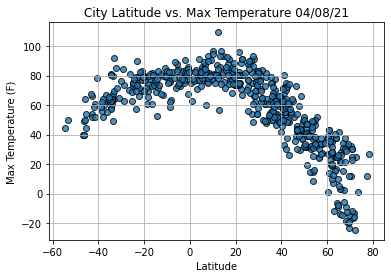

In [26]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

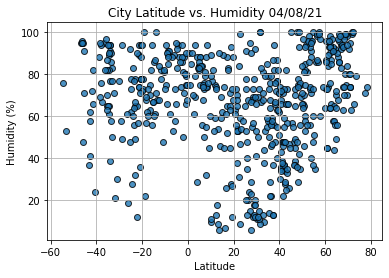

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

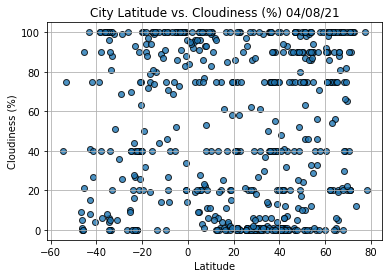

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

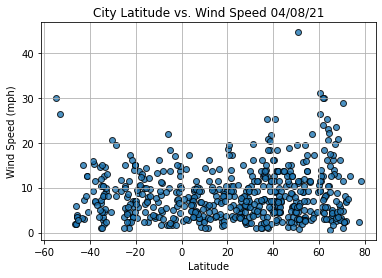

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [71]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [72]:
index13 = city_data_df.loc[13]
index13

City                        Vaini
Lat                         -21.2
Lng                        -175.2
Max Temp                     69.8
Humidity                       94
Cloudiness                     20
Wind Speed                   3.44
Country                        TO
Date          2021-04-08 18:56:33
Name: 13, dtype: object

In [73]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4       True
       ...  
569     True
570     True
571     True
572     True
573    False
Name: Lat, Length: 574, dtype: bool

In [74]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bonthe,7.5264,-12.5050,81.73,79,22,9.82,SL,2021-04-08 18:56:29
1,Sangar,63.9242,127.4739,16.59,91,100,20.54,RU,2021-04-08 18:56:29
4,Mukhen,48.1000,136.1000,29.39,78,100,8.50,RU,2021-04-08 18:56:30
5,Yellowknife,62.4560,-114.3525,6.80,66,75,18.41,CA,2021-04-08 18:56:31
6,Saskylakh,71.9167,114.0833,-13.11,99,100,6.93,RU,2021-04-08 18:56:31


In [75]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

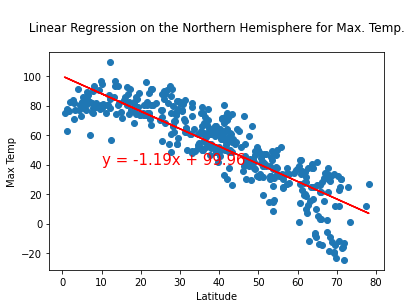

In [104]:
# Linear regression on the Northern Hemisphere
plt.title("\n Linear Regression on the Northern Hemisphere for Max. Temp. \n")
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

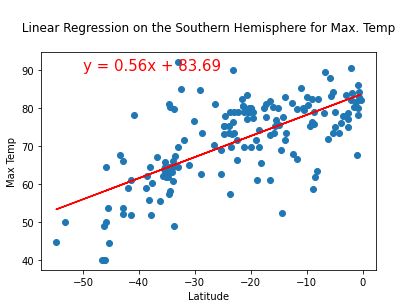

In [103]:
# Linear regression on the Southern Hemisphere
plt.title("\n Linear Regression on the Southern Hemisphere for Max. Temp \n")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

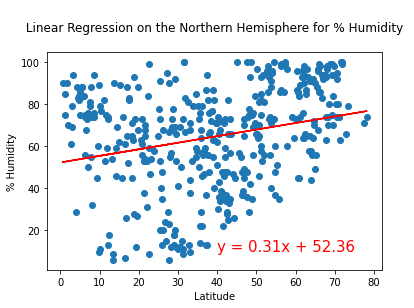

In [102]:
# Linear regression on the Northern Hemisphere
plt.title(" \n Linear Regression on the Northern Hemisphere for % Humidity \n")
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

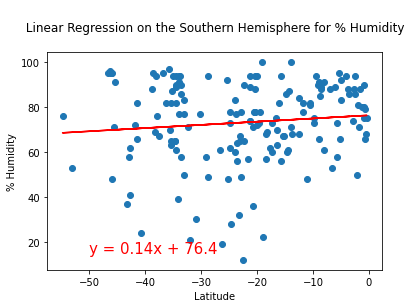

In [101]:
# Linear regression on the Southern Hemisphere
plt.title("\n Linear Regression on the Southern Hemisphere for % Humidity \n")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

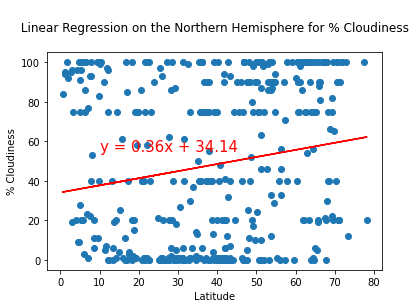

In [99]:
# Linear regression on the Northern Hemisphere
plt.title("\n Linear Regression on the Northern Hemisphere for % Cloudiness \n")
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

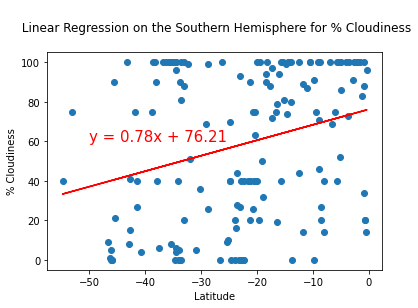

In [96]:
# Linear regression on the Southern Hemisphere
plt.title("\n Linear Regression on the Southern Hemisphere for % Cloudiness\n")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

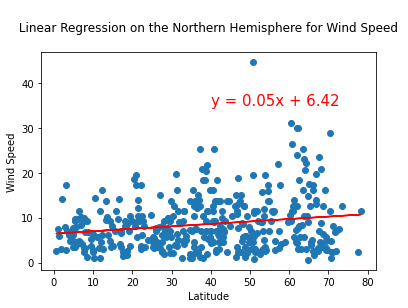

In [108]:
# Linear regression on the Northern Hemisphere
plt.title("\n Linear Regression on the Northern Hemisphere for Wind Speed \n")
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(40,35))

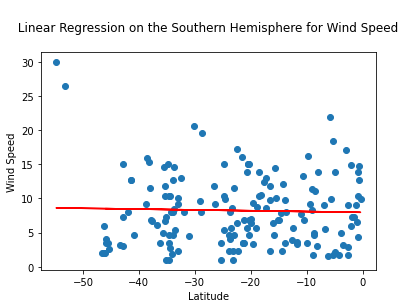

In [110]:
# Linear regression on the Southern Hemisphere
plt.title("\n Linear Regression on the Southern Hemisphere for Wind Speed \n")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-50,35))